We use this notebook to make sure that the Time Machine does not throw errors on common data types.
It would be nice for this to be checkable by a test that is run.

In [1]:
using IJuliaTimeMachine
TM = IJuliaTimeMachine

IJuliaTimeMachine

In [2]:
using Random

# Common data types

In [3]:
cell = IJulia.n
a = 1
b = 1.0
c = BigInt(1)
d = BigFloat(1.0)
e = 2//3
f = typemax(UInt)
g = false
i = :symbol
j = (1, "a")
k = [1, "a"]
l = deepcopy(k)
l[1] = l
m = (a=1, b = "b")
n = :(a = 1)
o = quote a = 1 end
p = "string"
q = (2 => "string")
r = Dict(2 => "string", "a" => 2)
s = randn(10,10)
t = Random.MersenneTwister()
42

42

In [4]:
a1 = deepcopy(a)
b1 = deepcopy(b)
c1 = deepcopy(c)
d1 = deepcopy(d)
e1 = deepcopy(e)
f1 = deepcopy(f)
g1 = deepcopy(g)
i1 = deepcopy(i)
j1 = deepcopy(j)
k1 = deepcopy(k)
l1 = deepcopy(l)
m1 = deepcopy(m)
n1 = deepcopy(n)
o1 = deepcopy(o)
p1 = deepcopy(p)
q1 = deepcopy(q)
r1 = deepcopy(r)
s1 = deepcopy(s)
t1 = deepcopy(t)
;

In [5]:
a = nothing
b = nothing
c = nothing
d = nothing
e = nothing
f = nothing
g = nothing
i = nothing
j = nothing
k = nothing
l = nothing
m = nothing
n = nothing
o = nothing
p = nothing
q = nothing
r = nothing
s = nothing
t = nothing
;

In [6]:
@past cell

42

In [7]:
@assert ans == 42
@assert a == a1
@assert b == b1
@assert c == c1
@assert d == d1
@assert e == e1
@assert f == f1
@assert g == g1
@assert i == i1
@assert j == j1
@assert k == k1
@assert l[2] == l1[2]
@assert l[1][2] == l1[1][2]
@assert m == m1
@assert n == n1
@assert getfield(o,2)[2] == getfield(o1,2)[2]
@assert p == p1
@assert q == q1
@assert r == r1
@assert s == s1
@assert t == t1


In [8]:
cell = IJulia.n
struct S
    a
    b
end
za = S(1, "b")
#zb = S(2, S)
zc = S(1.0, 1)

S(1.0, 1)

In [9]:
za1 = deepcopy(za)
#zb1 = deepcopy(zb)
zc1 = deepcopy(zc)
;

In [10]:
za = zb = zc = nothing

In [11]:
@past cell
@assert za1 == za
#@assert zb1 == zb
@assert zc1 == zc

# Inside a @thread

In [12]:
cell = IJulia.n
TM.@thread begin
    a2 = 1
    b2 = 1.0
    c2 = BigInt(1)
    d2 = BigFloat(1.0)
    e2 = 2//3
    f2 = typemax(UInt)
    g2 = false
    #h2 = Float64
    i2 = :symbol
    j2 = (1, "a")
    k2 = [1, "a"]
    l2 = deepcopy(k2)
    l2[1] = l2
    m2 = (a=1, b = "b")
    n2 = :(a = 1)
    o2 = quote a = 1 end
    p2 = "string"
    q2 = (2 => "string")
    r2 = Dict(2 => "string", "a" => 2)
    s2 = ones(10,10)

    za2 = S(1, "b")
    #zb2 = S(2, S)
    zc2 = S(1.0, 1)
    
    42
end

Task (runnable) @0x000000011219b610

In [13]:
sleep(1)
@past cell

42

In [14]:
@assert ans == 42
@assert a2 == a1
@assert b2 == b1
@assert c2 == c1
@assert d2 == d1
@assert e2 == e1
@assert f2 == f1
@assert g2 == g1
@assert i2 == i1
@assert j2 == j1
@assert k2 == k1
@assert l2[2] == l1[2]
@assert l2[1][2] == l1[1][2]
@assert m2 == m1
@assert n2 == n1
@assert getfield(o2,2)[2] == getfield(o1,2)[2]
@assert p2 == p1
@assert q2 == q1
@assert r2 == r1
@assert s2 == ones(10,10)
@assert za1 == za2
#@assert zb1 == zb2
@assert zc1 == zc2

# Functions and DataTypes are not copyable

In [15]:
fun(x) = x+1
a_fun = [1,fun,"3"]
@assert TM.can_copy(fun) == false
@assert TM.can_copy(a_fun) == false

In [16]:
@assert TM.can_copy(Float64) == false

# Files should NOT be copyable

In [17]:
f = open("test.txt","w")

IOStream(<file test.txt>)

In [18]:
@assert TM.can_copy(f) == false

In [19]:
close(f)

# Plots and DataFrames

In [20]:
using DataFrames, Plots

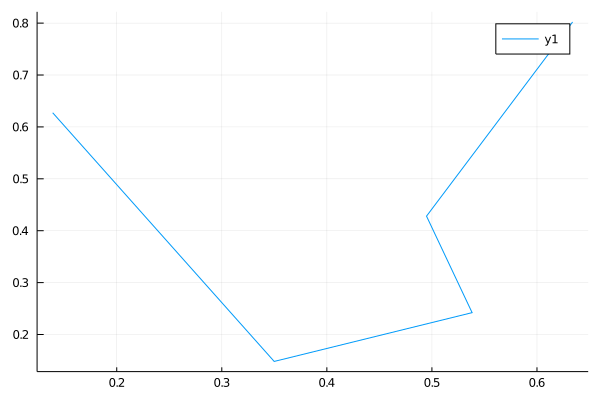

In [21]:
cell = IJulia.n
v = DataFrame(A = 1:4, B = ["M", "F", "F", "M"])
w = plot(rand(5), rand(5))

In [22]:
v1 = deepcopy(v)
u = v = w = nothing
w

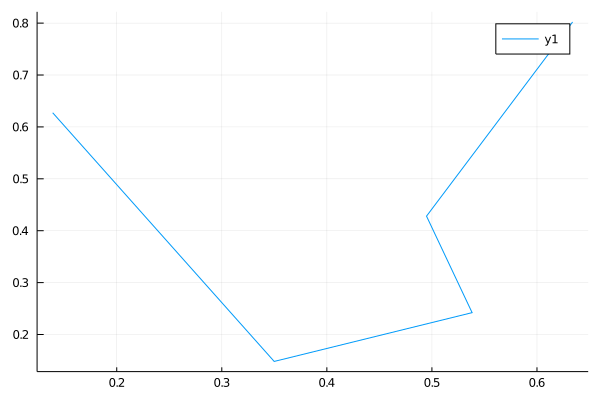

In [23]:
@past cell
@assert v1 == v
w